In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import requests #import requests library
import json,os,datetime
import csv
from pandas import DataFrame #reading data as tables
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns #for beautiful plots
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import word_tokenize
from googletrans import Translator 

In [2]:
link = 'https://raw.githubusercontent.com/python-for-ml/sent-analysis/master/finaldataset.csv'
data = pd.read_csv(link)
data=data.drop(['title_x','title_y','title','value'],axis=1)
data.head()

,data,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,কিছুটা নেতিবাচক
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,কিছুটা নেতিবাচক
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,নিশ্চিত নেতিবাচক
3,চুরি নয় লুটপাট,নিশ্চিত নেতিবাচক
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,নিরপেক্ষ


In [3]:
A = set(data['tag'])
print(A)

{'নিশ্চিত ইতিবাচক', 'কিছুটা নেতিবাচক', 'কিছুটা ইতিবাচক', 'নিশ্চিত নেতিবাচক', 'নিরপেক্ষ'}


In [4]:
data['tag']=data['tag'].replace('কিছুটা নেতিবাচক', 'Somewhat negative')
data['tag']=data['tag'].replace('কিছুটা ইতিবাচক', 'Somewhat positive')
data['tag']=data['tag'].replace('নিশ্চিত নেতিবাচক','Surely negative')
data['tag']=data['tag'].replace('নিরপেক্ষ', 'Neutral')
data['tag']=data['tag'].replace('নিশ্চিত ইতিবাচক', 'Surely positive')

In [5]:
Labels = ['Somewhat negative', 'Somewhat positive', 'Surely negative', 'Neutral', 'Surely positive']

In [6]:
data = data.rename(columns={"data": "Data", "tag": "Label"})

In [7]:
sns.set(rc={'figure.figsize':(12,7)})

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


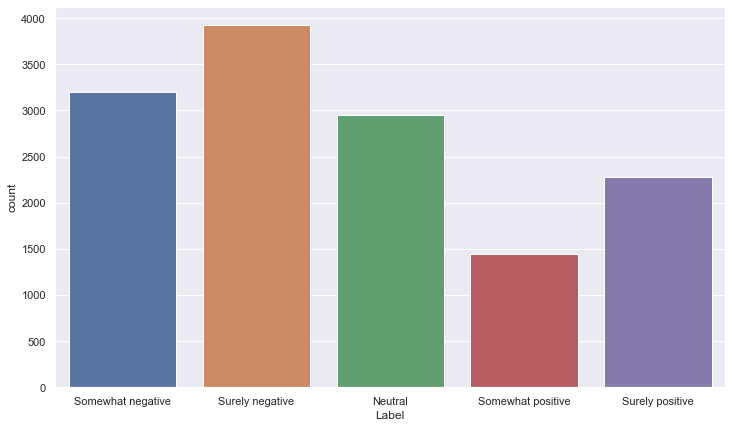

In [8]:
fig = sns.countplot(data['Label'])

In [9]:
pie_chart_data = data["Label"].value_counts().to_numpy()

In [18]:
print(pie_chart_data)

[3928 3198 2951 2280 1445]


NameError: name 'p' is not defined

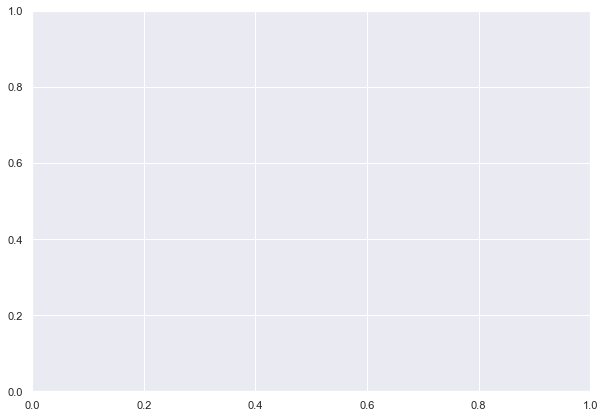

In [10]:
# Creating explode data 
explode = (0.1, 0.0, 0.2, 0.3, 0.0) 
  
# Creating color parameters 
colors = ( "orange", "cyan", "brown", 
          "grey", "indigo") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = pct / 100*np.sum(allvalues)
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(p,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Labels, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  
# Adding legend 
ax.legend(wedges, Labels, 
          title ="Cars", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1,1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 

In [7]:
data['Label']=data['Label'].replace('Somewhat negative','Negative')
data['Label']=data['Label'].replace('Somewhat positive','Positive')
data['Label']=data['Label'].replace('Surely negative','Negative')
data['Label']=data['Label'].replace('Surely positive','Positive')
#data = data[data['Label'] != 'Neutral']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


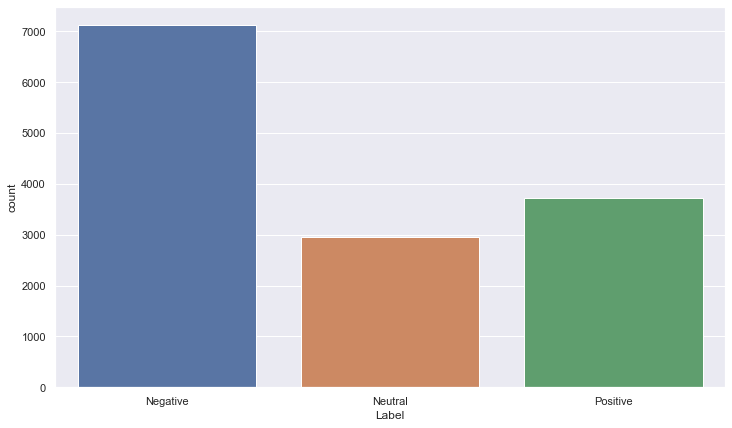

In [12]:
#sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
fig = sns.countplot(data['Label'])

In [19]:
data['Label'].value_counts()

Negative    7126
Positive    3725
Neutral     2951
Name: Label, dtype: int64

In [8]:
df = pd.read_csv(r"https://raw.githubusercontent.com/python-for-ml/sent-analysis/master/finaldataset.csv") 
  

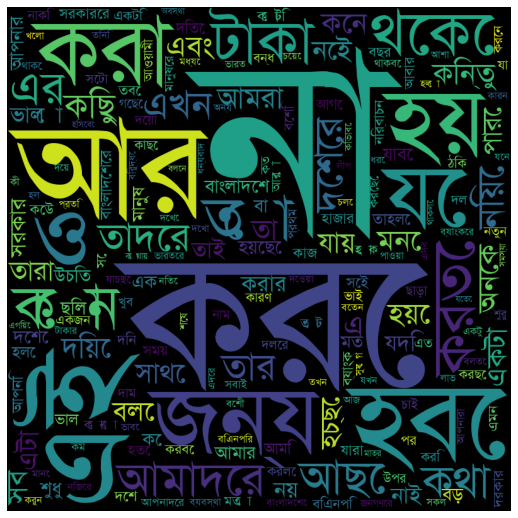

In [9]:
from bnlp.corpus import stopwords

stopwords = set(stopwords()) 
d = df['data'].tolist()
corpus = []

for i in range(len(d)):
    corpus.append(word_tokenize(d[i]))
from itertools import chain
corpus =list(chain.from_iterable(corpus))
#corpus = [i for i in corpus if i not in stopwords]
corpus = [i for i in corpus if i != 'কি']
from collections import Counter
corpus=Counter(corpus)

wordcloud = WordCloud(font_path='SolaimanLipi-8-Jan-2011.ttf',width = 800, height = 800, 
                background_color ='black', 
                #stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(corpus) 
  
# plot the WordCloud image                        
plt.figure(figsize = (7,7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [12]:
from collections import Counter
words = corpus
counter_obj = Counter(words)
word_count = counter_obj.most_common(n=100) #counter_obj.most_common(n=10)

In [13]:
word=[]
count=[]
from translate import Translator
translator= Translator(from_lang='Bengali',to_lang="English")
for i in word_count:
    word.append(translator.translate(i[0]))
    count.append(i[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

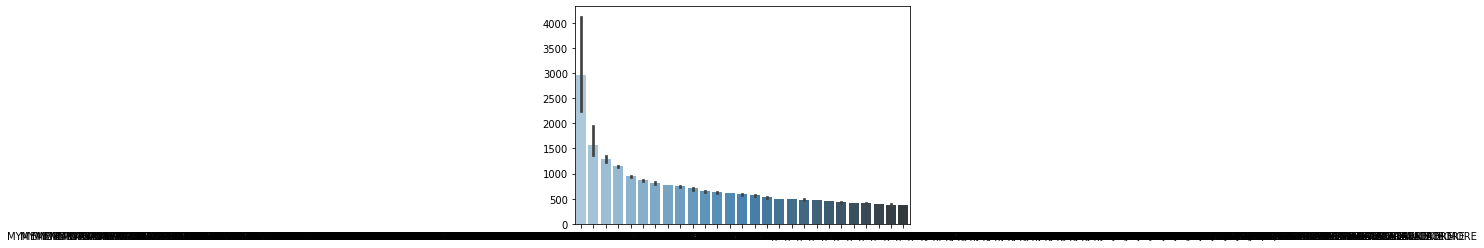

In [14]:
y_pos = np.arange(len(word))
sns.barplot(word,count,palette="Blues_d")

In [15]:
import fasttext
import fasttext.util

In [16]:
word_count = counter_obj.most_common(n=25)
ft = fasttext.load_model('/Users/rohith/Downloads/cc.bn.300.bin')
#fasttext.util.reduce_model(ft, size)
ft.get_dimension()

300

In [17]:
fasttext.util.reduce_model(ft, 3)

In [18]:
words=[]
for i in word_count:
    words.append(translator.translate(i[0]))

In [19]:
X=[]
Y=[]
Z=[]
for i in words:
    d=ft.get_word_vector(i)
    X.append(d[0])
    Y.append(d[1])
    Z.append(d[2])

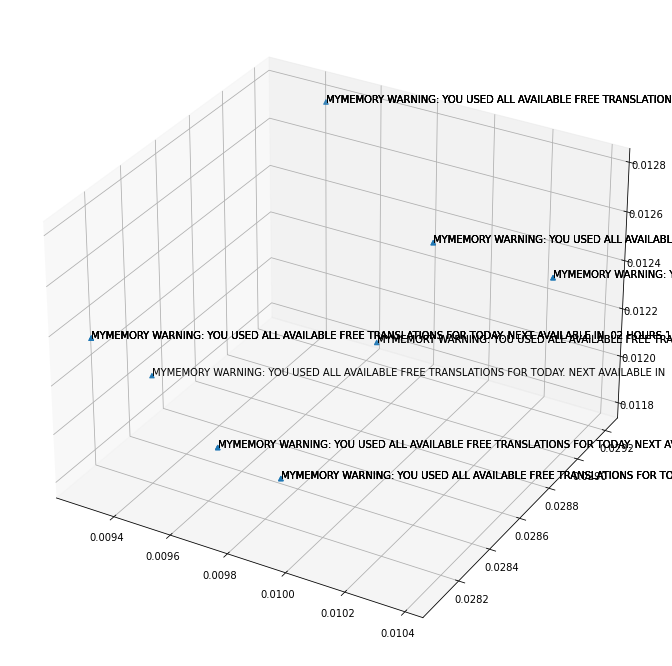

In [20]:
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
my_cmap = plt.get_cmap('hsv')
# Creating plot
ax.scatter3D(X, Y, Z, cmap = my_cmap, marker ='^')
for a in range(len(words)):
    ax.text(X[a],Y[a],Z[a],words[a])